In [244]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.feature_extraction import FeatureHasher
! pip install category_encoders
import category_encoders as ce

   ---------------------------------------- 0.0/81.9 kB ? eta -:--:--
   ---------------------------------------- 0.0/81.9 kB ? eta -:--:--
   ----- ---------------------------------- 10.2/81.9 kB ? eta -:--:--
   ------------------------------ --------- 61.4/81.9 kB 656.4 kB/s eta 0:00:01
   ---------------------------------------- 81.9/81.9 kB 761.9 kB/s eta 0:00:00


In [2]:
df_original = pd.read_csv('profiles.csv')
df = pd.read_csv('profiles.csv')
print(df.head())

   age       body_type               diet    drinks      drugs  \
0   22  a little extra  strictly anything  socially      never   
1   35         average       mostly other     often  sometimes   
2   38            thin           anything  socially        NaN   
3   23            thin         vegetarian  socially        NaN   
4   29        athletic                NaN  socially      never   

                           education  \
0      working on college/university   
1              working on space camp   
2     graduated from masters program   
3      working on college/university   
4  graduated from college/university   

                                              essay0  \
0  about me:<br />\n<br />\ni would love to think...   
1  i am a chef: this is what that means.<br />\n1...   
2  i'm not ashamed of much, but writing public te...   
3          i work in a library and go to school. . .   
4  hey how's it going? currently vague on the pro...   

                         

In [3]:
print(df.columns)

Index(['age', 'body_type', 'diet', 'drinks', 'drugs', 'education', 'essay0',
       'essay1', 'essay2', 'essay3', 'essay4', 'essay5', 'essay6', 'essay7',
       'essay8', 'essay9', 'ethnicity', 'height', 'income', 'job',
       'last_online', 'location', 'offspring', 'orientation', 'pets',
       'religion', 'sex', 'sign', 'smokes', 'speaks', 'status'],
      dtype='object')


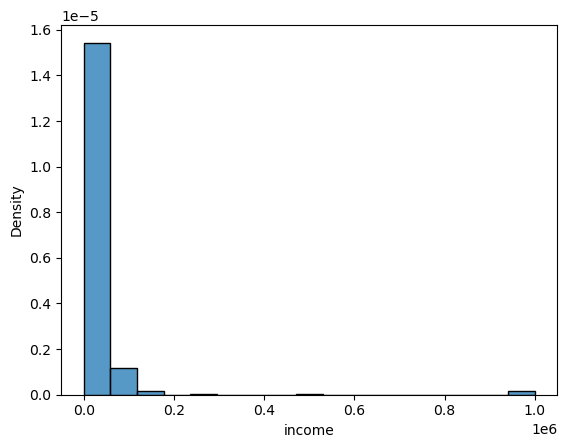

In [4]:
sns.histplot(df.income, stat = 'density')
plt.show()
plt.close()

In [5]:
print(df.body_type.value_counts(normalize= True))

body_type
average           0.268106
fit               0.232589
athletic          0.216267
thin              0.086203
curvy             0.071802
a little extra    0.048106
skinny            0.032516
full figured      0.018463
overweight        0.008124
jacked            0.007704
used up           0.006496
rather not say    0.003623
Name: proportion, dtype: float64


In [6]:
print(df.diet.value_counts(normalize= True))

diet
mostly anything        0.466513
anything               0.173919
strictly anything      0.143822
mostly vegetarian      0.096875
mostly other           0.028326
strictly vegetarian    0.024613
vegetarian             0.018762
strictly other         0.012714
mostly vegan           0.009507
other                  0.009311
strictly vegan         0.006413
vegan                  0.003825
mostly kosher          0.002419
mostly halal           0.001350
strictly halal         0.000506
strictly kosher        0.000506
halal                  0.000309
kosher                 0.000309
Name: proportion, dtype: float64


In [7]:
print(df.drinks.value_counts(normalize= True))

drinks
socially       0.733484
rarely         0.104580
often          0.090659
not at all     0.057355
very often     0.008269
desperately    0.005653
Name: proportion, dtype: float64


In [8]:
print(df.drugs.value_counts(normalize= True))

drugs
never        0.822483
sometimes    0.168578
often        0.008939
Name: proportion, dtype: float64


In [9]:
print(df.education.value_counts(normalize= True))

education
graduated from college/university    0.449360
graduated from masters program       0.168067
working on college/university        0.107131
working on masters program           0.031565
graduated from two-year college      0.028715
graduated from high school           0.026783
graduated from ph.d program          0.023857
graduated from law school            0.021044
working on two-year college          0.020143
dropped out of college/university    0.018662
working on ph.d program              0.018437
college/university                   0.015023
graduated from space camp            0.012322
dropped out of space camp            0.009809
graduated from med school            0.008365
working on space camp                0.008346
working on law school                0.005045
two-year college                     0.004164
working on med school                0.003976
dropped out of two-year college      0.003582
dropped out of masters program       0.002626
masters program         

In [10]:
print(df.location.value_counts(normalize= True))

location
san francisco, california         0.518200
oakland, california               0.120342
berkeley, california              0.070263
san mateo, california             0.022203
palo alto, california             0.017749
                                    ...   
south wellfleet, massachusetts    0.000017
orange, california                0.000017
astoria, new york                 0.000017
london, united kingdom            0.000017
rochester, michigan               0.000017
Name: proportion, Length: 199, dtype: float64


In [11]:
print(df.offspring.value_counts(normalize= True))

offspring
doesn&rsquo;t have kids                                0.310027
doesn&rsquo;t have kids, but might want them           0.158909
doesn&rsquo;t have kids, but wants them                0.146196
doesn&rsquo;t want kids                                0.120033
has kids                                               0.077220
has a kid                                              0.077138
doesn&rsquo;t have kids, and doesn&rsquo;t want any    0.046422
has kids, but doesn&rsquo;t want more                  0.018126
has a kid, but doesn&rsquo;t want more                 0.011277
has a kid, and might want more                         0.009473
wants kids                                             0.009227
might want kids                                        0.007464
has kids, and might want more                          0.004716
has a kid, and wants more                              0.002912
has kids, and wants more                               0.000861
Name: proportion, dtype: float

In [12]:
print(df.orientation.value_counts(normalize= True))

orientation
straight    0.860875
gay         0.092967
bisexual    0.046158
Name: proportion, dtype: float64


In [13]:
print(df.pets.value_counts(normalize= True))

pets
likes dogs and likes cats          0.370119
likes dogs                         0.180487
likes dogs and has cats            0.107758
has dogs                           0.103285
has dogs and likes cats            0.058289
likes dogs and dislikes cats       0.050693
has dogs and has cats              0.036827
has cats                           0.035128
likes cats                         0.026558
has dogs and dislikes cats         0.013791
dislikes dogs and likes cats       0.005996
dislikes dogs and dislikes cats    0.004897
dislikes cats                      0.003048
dislikes dogs and has cats         0.002024
dislikes dogs                      0.001099
Name: proportion, dtype: float64


In [14]:
print(df.religion.value_counts(normalize= True))

religion
agnosticism                                   0.068580
other                                         0.067749
agnosticism but not too serious about it      0.066365
agnosticism and laughing about it             0.062840
catholicism but not too serious about it      0.058359
atheism                                       0.054758
other and laughing about it                   0.053348
atheism and laughing about it                 0.052216
christianity                                  0.049270
christianity but not too serious about it     0.049144
other but not too serious about it            0.039124
judaism but not too serious about it          0.038192
atheism but not too serious about it          0.033182
catholicism                                   0.026788
christianity and somewhat serious about it    0.023338
atheism and somewhat serious about it         0.021349
other and somewhat serious about it           0.021299
catholicism and laughing about it             0.018278
j

In [15]:
print(df.sex.value_counts(normalize= True))

sex
m    0.597688
f    0.402312
Name: proportion, dtype: float64


In [16]:
print(df.smokes.value_counts(normalize= True))

smokes
no                0.806408
sometimes         0.069570
when drinking     0.055847
yes               0.040985
trying to quit    0.027189
Name: proportion, dtype: float64


In [17]:
print(df.status.value_counts(normalize= True))

status
single            0.929120
seeing someone    0.034431
available         0.031111
married           0.005171
unknown           0.000167
Name: proportion, dtype: float64


In [18]:
print(df.ethnicity.value_counts(normalize= True))

ethnicity
white                                                                 0.605001
asian                                                                 0.113036
hispanic / latin                                                      0.052022
black                                                                 0.037003
other                                                                 0.031438
                                                                        ...   
middle eastern, indian, white                                         0.000018
asian, middle eastern, black, white, other                            0.000018
asian, middle eastern, indian, hispanic / latin, white, other         0.000018
black, native american, indian, pacific islander, hispanic / latin    0.000018
asian, black, indian                                                  0.000018
Name: proportion, Length: 217, dtype: float64


In [19]:
print(df.job.value_counts(normalize= True))

job
other                                0.146653
student                              0.094342
science / tech / engineering         0.093685
computer / hardware / software       0.090999
artistic / musical / writer          0.085781
sales / marketing / biz dev          0.084854
medicine / health                    0.071114
education / academia                 0.067887
executive / management               0.045857
banking / financial / real estate    0.043789
entertainment / media                0.043480
law / legal services                 0.026687
hospitality / travel                 0.026359
construction / craftsmanship         0.019730
clerical / administrative            0.015556
political / government               0.013682
rather not say                       0.008425
transportation                       0.007073
unemployed                           0.005276
retired                              0.004831
military                             0.003942
Name: proportion, dtype: float

In [20]:
df = df[df.age != 109]
df = df[df.age != 110]

In [21]:
print(df.describe())

                age        height          income
count  59944.000000  59941.000000    59944.000000
mean      32.337715     68.294857    20033.890965
std        9.442423      3.993377    97347.747284
min       18.000000      1.000000       -1.000000
25%       26.000000     66.000000       -1.000000
50%       30.000000     68.000000       -1.000000
75%       37.000000     71.000000       -1.000000
max       69.000000     95.000000  1000000.000000


In [22]:
print(df[df.offspring.isna() == True])

       age body_type                 diet      drinks  drugs  \
2       38      thin             anything    socially    NaN   
4       29  athletic                  NaN    socially  never   
6       32       fit    strictly anything    socially  never   
9       37  athletic      mostly anything  not at all  never   
10      35   average      mostly anything    socially    NaN   
...    ...       ...                  ...         ...    ...   
59931   24       fit  strictly vegetarian      rarely  never   
59933   30       NaN                  NaN    socially  never   
59937   32      thin             anything    socially    NaN   
59940   31       NaN                  NaN    socially  never   
59945   39   average                  NaN    socially    NaN   

                               education  \
2         graduated from masters program   
4      graduated from college/university   
6      graduated from college/university   
9            working on two-year college   
10         

In [23]:
df_nan = pd.DataFrame(columns = df.columns)
for column in df.columns:
    print(f'Nan count for {column}: {round(df[column].isna().sum()/len(df), 2)}')
    df_nan[column] = [round(df[column].isna().sum()/len(df), 2)]
print(df_nan)

Nan count for age: 0.0
Nan count for body_type: 0.09
Nan count for diet: 0.41
Nan count for drinks: 0.05
Nan count for drugs: 0.23
Nan count for education: 0.11
Nan count for essay0: 0.09
Nan count for essay1: 0.13
Nan count for essay2: 0.16
Nan count for essay3: 0.19
Nan count for essay4: 0.18
Nan count for essay5: 0.18
Nan count for essay6: 0.23
Nan count for essay7: 0.21
Nan count for essay8: 0.32
Nan count for essay9: 0.21
Nan count for ethnicity: 0.09
Nan count for height: 0.0
Nan count for income: 0.0
Nan count for job: 0.14
Nan count for last_online: 0.0
Nan count for location: 0.0
Nan count for offspring: 0.59
Nan count for orientation: 0.0
Nan count for pets: 0.33
Nan count for religion: 0.34
Nan count for sex: 0.0
Nan count for sign: 0.18
Nan count for smokes: 0.09
Nan count for speaks: 0.0
Nan count for status: 0.0
   age  body_type  diet  drinks  drugs  education  essay0  essay1  essay2  \
0  0.0       0.09  0.41    0.05   0.23       0.11    0.09    0.13    0.16   

   essa

In [24]:
df_nan = pd.melt(frame = df_nan, value_vars = df_nan.columns, value_name = 'nan_prop', var_name = 'column')
print(df_nan)

         column  nan_prop
0           age      0.00
1     body_type      0.09
2          diet      0.41
3        drinks      0.05
4         drugs      0.23
5     education      0.11
6        essay0      0.09
7        essay1      0.13
8        essay2      0.16
9        essay3      0.19
10       essay4      0.18
11       essay5      0.18
12       essay6      0.23
13       essay7      0.21
14       essay8      0.32
15       essay9      0.21
16    ethnicity      0.09
17       height      0.00
18       income      0.00
19          job      0.14
20  last_online      0.00
21     location      0.00
22    offspring      0.59
23  orientation      0.00
24         pets      0.33
25     religion      0.34
26          sex      0.00
27         sign      0.18
28       smokes      0.09
29       speaks      0.00
30       status      0.00


In [25]:
sorted_nan_count = df_nan.sort_values(by = 'nan_prop', ascending=False).reset_index()

column_names = [column.capitalize() for column in sorted_nan_count.column]
print(column_names)
    

['Offspring', 'Diet', 'Religion', 'Pets', 'Essay8', 'Essay6', 'Drugs', 'Essay9', 'Essay7', 'Essay3', 'Essay4', 'Essay5', 'Sign', 'Essay2', 'Job', 'Essay1', 'Education', 'Smokes', 'Essay0', 'Ethnicity', 'Body_type', 'Drinks', 'Speaks', 'Sex', 'Age', 'Orientation', 'Location', 'Last_online', 'Income', 'Height', 'Status']


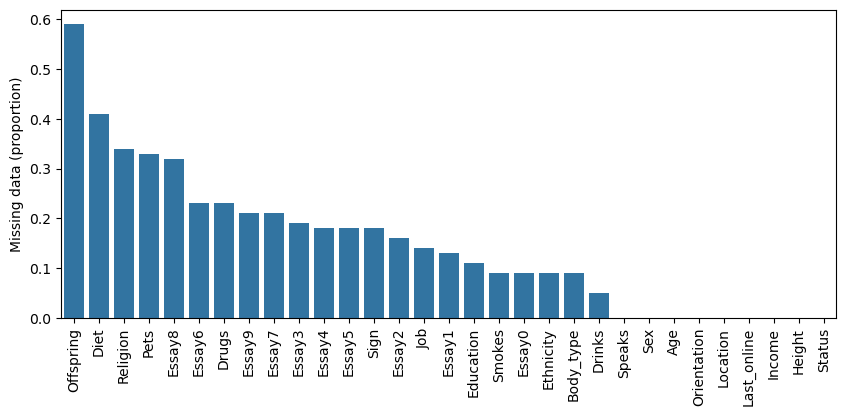

In [26]:
sorted_nan_count = df_nan.sort_values(by = 'nan_prop', ascending=False).reset_index()


plt.figure(figsize=(10, 4))

# Use the categorical order to ensure correct sorting in the plot
sns.barplot(x=pd.Categorical(sorted_nan_count['index'], categories=sorted_nan_count['index']),
            y=sorted_nan_count['nan_prop'])
plt.ylabel('Missing data (proportion)')
plt.xticks(rotation='vertical', ticks = range(0, 31), labels = column_names)
plt.show()
plt.close()


There is up to 60% of missing data in the offspring question, this is probably a sensitive and complex topic that people don't feel comfortable talking about. <br>
There is up to 40% missing data in the diet question, again another sensitive topic.
Interestingly, between 30% and 35% of data is missing from the questions about religion, pets and essay8. Religion is another sensitive topic therefore not very surprising.
However, I was not expecting so much missing data from the pets question, could there be some underlining reason? I could not find information about Essay 8, why does it have up to 10% more missing data compared to the other essays? <br>
It might be worth it to fill the nan values in offspring, diet, religion and pets as "Prefer not to say". <br>
I must say, I am quite surprised by the presence of a sex column instead of a gender column. Also most users in this data are based in California.

In [28]:
df = df.fillna(value = {'offspring': 'I prefer not to say', 'diet': 'I prefer not to say', 'religion': 'I prefer not to say', 'pets': 'I prefer not to say', 'drugs': 'I prefer not to say', 'drinks' : 'I prefer not to say', 'body_type': 'I prefer not to say'})
# print(df.head(5))
print(df.drugs.value_counts())

drugs
never                  37723
I prefer not to say    14079
sometimes               7732
often                    410
Name: count, dtype: int64


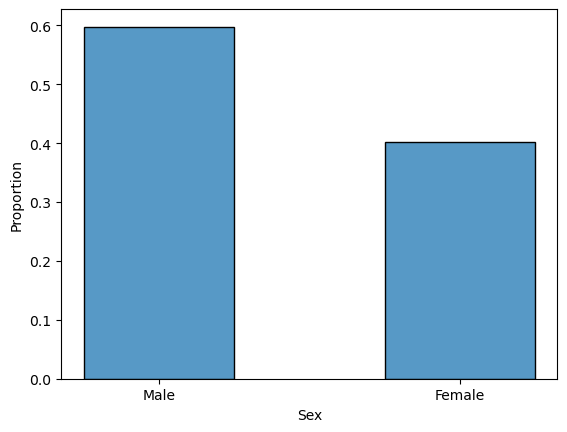

In [29]:
sns.histplot(x = df.sex, stat= 'proportion', shrink=0.5)
plt.xticks(ticks=[0, 1], labels=['Male', 'Female'])
plt.xlabel('Sex')
plt.ylabel('Proportion')
plt.show()
plt.close()

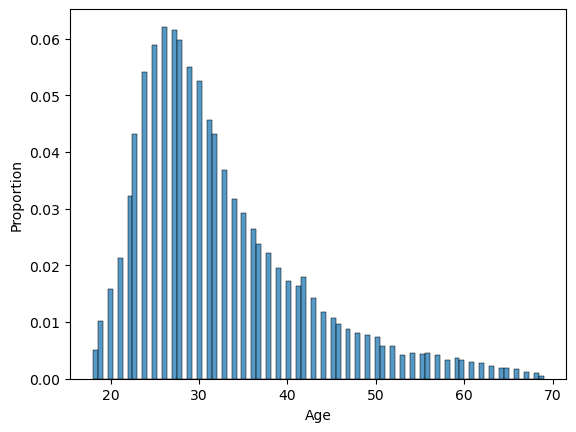

In [30]:
sns.histplot(x = df.age, stat= 'proportion')
# plt.xticks(ticks=[0, 1], labels=['Male', 'Female'])
plt.xlabel('Age')
plt.ylabel('Proportion')
plt.show()
plt.close()

In [201]:
print(df.body_type.unique())

['a little extra' 'average' 'thin' 'athletic' 'fit' 'I prefer not to say'
 'skinny' 'curvy' 'full figured' 'jacked' 'rather not say' 'used up'
 'overweight']


In [203]:
def simplify_body(row):
    if 'a little extra' in row or 'overweight' in row:
        return 'Overweight'
    elif 'average' in row: 
        return 'Average'
    elif 'thin' in row or 'athletic' in row or 'fit' in row or 'skinny' in row or 'jacked' in row:
        return 'Slim/Fit'
    elif 'I prefer not to say' in row or 'rather not say' in row or 'used up' in row:
        return 'Ambiguous/not specified'
    else:
        return 'Curvy/Fuller'

df.body_type = df.body_type.apply(simplify_body)
print(df.body_type.value_counts(normalize=True))

body_type
Slim/Fit                   0.524477
Average                    0.244482
Ambiguous/not specified    0.097472
Curvy/Fuller               0.082329
Overweight                 0.051241
Name: proportion, dtype: float64


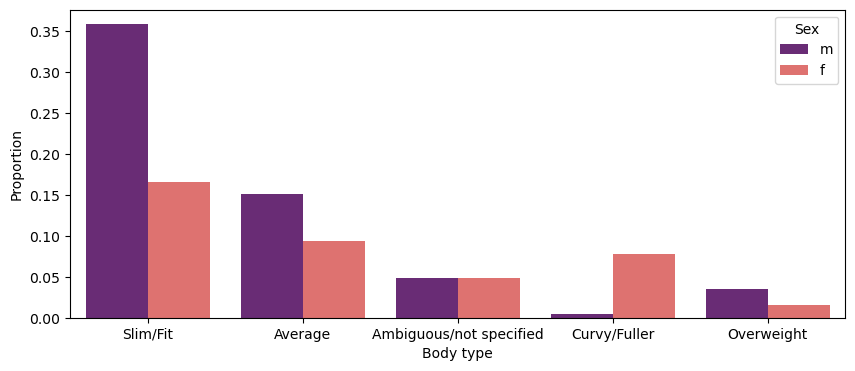

In [222]:
order_body = df.body_type.value_counts()

plt.figure(figsize=(10,4))
sns.countplot(x = df.body_type, hue= df.sex, palette = 'magma', stat = 'proportion', order = order_body.index)
plt.legend(title = 'Sex')
plt.xlabel('Body type')
plt.ylabel('Proportion')
plt.show()
plt.close()

In [31]:
map_edu = {
    'graduated from college/university': 'College',
    'graduated from masters program': 'Master',
    'working on college/university': 'Student',
    'working on masters program': 'Student',
    'graduated from two-year college': 'College',
    'graduated from high school': 'High school',
    'graduated from ph.d program': 'PhD', 
    'graduated from law school': 'College', 
    'working on two-year college': 'Student',
    'dropped out of college/university': 'Other', 
    'working on ph.d program': 'Student', 
    'college/university': 'College',
    'graduated from space camp': 'Other',
    'dropped out of space camp': 'Other', 
    'graduated from med school': 'Med school', 
    'working on space camp': 'Student', 
    'working on law school': 'Student', 
    'two-year college': 'College', 
    'working on med school': 'Student', 
    'dropped out of two-year college': 'Other',
    'dropped out of masters program': 'Other', 
    'masters program': 'Master', 
    'dropped out of ph.d program': 'Other', 
    'dropped out of high school': 'Other', 
    'high school': 'High school',  
    'working on high school': 'Student', 
    'space camp': 'Other', 
    'ph.d program': 'PhD', 
    'law school': 'Law school',
    'dropped out of law school': 'Other', 
    'dropped out of med school': 'Other', 
    'med school': 'Med school'
}
df.education = df.education.map(map_edu)
print(df.education.value_counts(normalize=True))

education
College        0.518315
Student        0.196260
Master         0.170621
Other          0.052947
High school    0.028584
PhD            0.024345
Med school     0.008571
Law school     0.000356
Name: proportion, dtype: float64


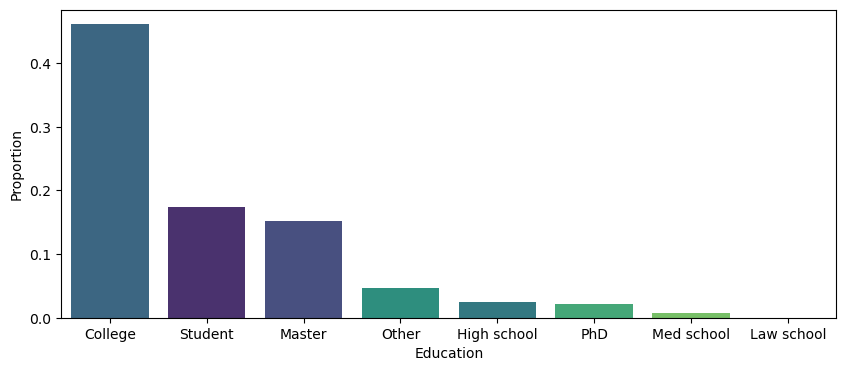

In [32]:
order_edu = df.education.value_counts()

plt.figure(figsize=(10, 4))
sns.countplot(x = df.education, stat= 'proportion', order = order_edu.index ,hue = df.education, legend=False, palette= 'viridis')
plt.xlabel('Education')
plt.ylabel('Proportion')   
plt.show()
plt.close()

In [33]:
# Use vectorized operations to modify the 'ethnicity' column
df.loc[df.ethnicity == 'pacific islander', 'ethnicity'] = 'Native / Pac. isl.'
df.loc[df.ethnicity == 'native american', 'ethnicity'] = 'Native / Pac. isl.'

# Assign 'Other' to all values that are not in the specified categories
df.loc[~df.ethnicity.isin(['white', 'asian', 'hispanic / latin', 'Native / Pac. isl.', 'black']), 'ethnicity'] = 'Other'

print(df.ethnicity.value_counts(normalize=True))

ethnicity
white                 0.547695
Other                 0.261060
asian                 0.102329
hispanic / latin      0.047094
black                 0.033498
Native / Pac. isl.    0.008324
Name: proportion, dtype: float64


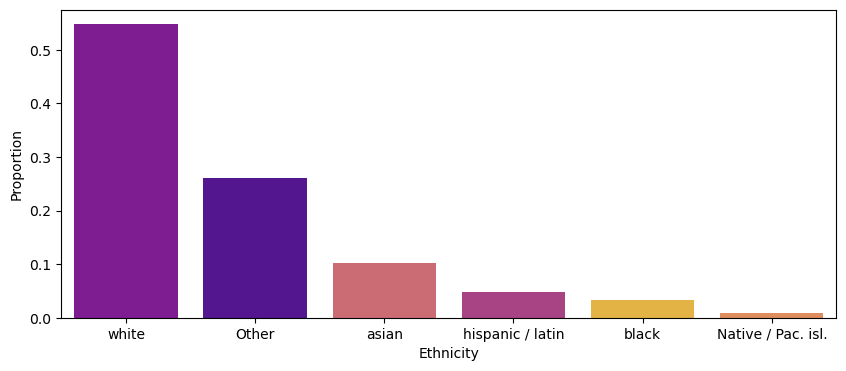

In [34]:
order_ethn = df.ethnicity.value_counts()

plt.figure(figsize=(10, 4))
sns.countplot(x = df.ethnicity, hue = df.ethnicity, order = order_ethn.index ,stat = 'proportion', palette= 'plasma')
plt.xlabel('Ethnicity')
plt.ylabel('Proportion')
plt.show()
plt.close()

In [35]:
print(df.offspring.unique())

['doesn&rsquo;t have kids, but might want them' 'I prefer not to say'
 'doesn&rsquo;t want kids' 'doesn&rsquo;t have kids, but wants them'
 'doesn&rsquo;t have kids' 'wants kids' 'has a kid' 'has kids'
 'doesn&rsquo;t have kids, and doesn&rsquo;t want any'
 'has kids, but doesn&rsquo;t want more'
 'has a kid, but doesn&rsquo;t want more' 'has a kid, and wants more'
 'has kids, and might want more' 'might want kids'
 'has a kid, and might want more' 'has kids, and wants more']


In [36]:
df.loc[df.offspring == 'has kids, and might want more', 'kids'] = 1
df.loc[df.offspring == 'has a kid, and might want more', 'kids'] = 1
df.loc[df.offspring == 'has a kid, and wants more', 'kids'] = 1
df.loc[df.offspring == 'has kids, and wants more', 'kids'] = 1
df.loc[df.offspring == 'has a kid, but doesn&rsquo;t want more', 'kids'] = 1
df.loc[df.offspring == 'has kids, but doesn&rsquo;t want more', 'kids'] = 1
df.loc[df.offspring == 'has a kid', 'kids'] = 1
df.loc[df.offspring == 'has kids', 'kids'] = 1

df.loc[~df.kids.isin([1]), 'kids'] = 0

print(df.kids.value_counts(normalize=True))

kids
0.0    0.91794
1.0    0.08206
Name: proportion, dtype: float64


In [37]:
# Use vectorized operations to modify the 'offspring' column
df.loc[df.offspring == 'doesn&rsquo;t have kids, but might want them', 'offspring'] = 'maybe'
df.loc[df.offspring == 'has kids, and might want more', 'offspring'] = 'maybe'
df.loc[df.offspring == 'has a kid, and might want more', 'offspring'] = 'maybe'
df.loc[df.offspring == 'might want kids', 'offspring'] = 'maybe'
df.loc[df.offspring == 'doesn&rsquo;t have kids, but wants them', 'offspring'] = 'yes'
df.loc[df.offspring == 'wants kids', 'offspring'] = 'yes'
df.loc[df.offspring == 'has a kid, and wants more', 'offspring'] = 'yes'
df.loc[df.offspring == 'has kids, and wants more', 'offspring'] = 'yes'
df.loc[df.offspring == 'doesn&rsquo;t want kids', 'offspring'] = 'no'
df.loc[df.offspring == 'has a kid, but doesn&rsquo;t want more', 'offspring'] = 'no'
df.loc[df.offspring == 'has kids, but doesn&rsquo;t want more', 'offspring'] = 'no'
df.loc[df.offspring == 'doesn&rsquo;t have kids, and doesn&rsquo;t want any', 'offspring'] = 'no'

# Assign 'Other' to all values that are not in the specified categories
df.loc[~df.offspring.isin(['yes', 'maybe', 'no', 'I prefer not to say']), 'offspring'] = 'Don\'t know'

print(df.offspring.value_counts(normalize=True))

offspring
I prefer not to say    0.593220
Don't know             0.188910
no                     0.079674
maybe                  0.073435
yes                    0.064760
Name: proportion, dtype: float64


In [38]:
print(df.pets.unique())

['likes dogs and likes cats' 'has cats' 'likes cats' 'I prefer not to say'
 'has dogs and likes cats' 'likes dogs and has cats'
 'likes dogs and dislikes cats' 'has dogs' 'has dogs and dislikes cats'
 'likes dogs' 'has dogs and has cats' 'dislikes dogs and has cats'
 'dislikes dogs and dislikes cats' 'dislikes cats'
 'dislikes dogs and likes cats' 'dislikes dogs']


In [39]:
df.loc[df.pets == 'has cats', 'has_pet'] = 1
df.loc[df.pets == 'has dogs and likes cats', 'has_pet'] = 2
df.loc[df.pets == 'likes dogs and has cats', 'has_pet'] = 1
df.loc[df.pets == 'has dogs', 'has_pet'] = 2
df.loc[df.pets == 'has dogs and dislikes cats', 'has_pet'] = 2
df.loc[df.pets == 'has dogs and has cats', 'has_pet'] = 3
df.loc[df.pets == 'dislikes dogs and has cats', 'has_pet'] = 1

df.loc[~df.has_pet.isin([1, 2, 3]), 'has_pet'] = 0
print(df.has_pet.value_counts(normalize=True))

has_pet
0.0    0.761561
2.0    0.117093
1.0    0.096757
3.0    0.024590
Name: proportion, dtype: float64


In [40]:
map_pets = {
    'likes dogs and likes cats': 'both',
    'has cats': 'cats',
    'likes cats': 'cats',
    'I prefer not to say': 'I prefer not to say', 
    'has dogs and likes cats': 'both', 
    'likes dogs and has cats': 'both',
    'likes dogs and dislikes cats': 'dogs', 
    'has dogs': 'dogs', 
    'has dogs and dislikes cats': 'dogs',
    'likes dogs': 'dogs', 
    'has dogs and has cats': 'both', 
    'dislikes dogs and has cats': 'cats', 
    'dislikes dogs and dislikes cats': 'neither',
    'dislikes cats': 'neither', 
    'dislikes dogs and likes cats': 'cats',
    'dislikes dogs': 'neither'
}
df.pets = df.pets.map(map_pets)
print(df.pets.value_counts(normalize=True))

pets
both                   0.382590
I prefer not to say    0.332293
dogs                   0.232534
cats                   0.046543
neither                0.006039
Name: proportion, dtype: float64


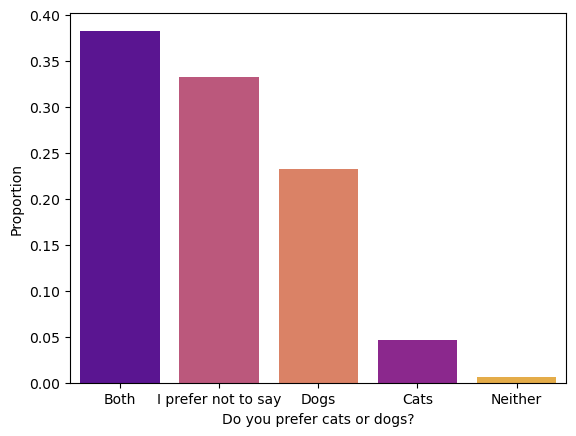

In [41]:
ordered_pets = df.pets.value_counts()

sns.countplot(x = df.pets, stat= 'proportion', order= ordered_pets.index ,hue = df.pets, palette= 'plasma')
plt.xticks(ticks= [0, 1, 2, 3, 4], labels = ['Both', 'I prefer not to say', 'Dogs', 'Cats', 'Neither'])
plt.xlabel('Do you prefer cats or dogs?')
plt.ylabel('Proportion')
plt.show()
plt.close()

In [42]:
print(df.religion.unique())

['agnosticism and very serious about it'
 'agnosticism but not too serious about it' 'I prefer not to say'
 'atheism' 'christianity' 'christianity but not too serious about it'
 'atheism and laughing about it' 'christianity and very serious about it'
 'other' 'catholicism' 'catholicism but not too serious about it'
 'catholicism and somewhat serious about it'
 'agnosticism and somewhat serious about it'
 'catholicism and laughing about it' 'agnosticism and laughing about it'
 'agnosticism' 'atheism and somewhat serious about it'
 'buddhism but not too serious about it'
 'other but not too serious about it' 'buddhism'
 'other and laughing about it' 'judaism but not too serious about it'
 'buddhism and laughing about it' 'other and somewhat serious about it'
 'other and very serious about it' 'hinduism but not too serious about it'
 'atheism but not too serious about it' 'judaism'
 'christianity and somewhat serious about it'
 'hinduism and very serious about it' 'atheism and very seriou

In [43]:
print(df.religion.head())

0       agnosticism and very serious about it
1    agnosticism but not too serious about it
2                         I prefer not to say
3                         I prefer not to say
4                         I prefer not to say
Name: religion, dtype: object


In [44]:
def simplify_religion(row):
    # Simplify religion values
    if 'christianity' in row or 'catholicism' in row:
        return 'Christian'
    elif 'agnosticism' in row:
        return 'Agnostic'
    elif 'atheism' in row:
        return 'Atheist'
    elif 'buddhism' in row:
        return 'Buddhist'
    elif 'judaism' in row:
        return 'Jewish'
    elif 'hinduism' in row:
        return 'Hindu'
    elif 'islam' in row:
        return 'Muslim'
    else:
        return 'I prefer not to say'

def simplify_seriousness(row):
    # Simplify seriousness values
    if 'laughing' in row or 'not too serious' in row:
        return 1
    elif 'somewhat serious' in row:
        return 3
    elif 'very serious' in row:
        return 4
    else:
        return 2

# Apply the simplifications
df['rel_commit'] = df['religion'].apply(simplify_seriousness)
df['religion'] = df['religion'].apply(simplify_religion)


In [45]:
print(df.religion.value_counts(normalize = True))
print(df.rel_commit.value_counts(normalize = True))


religion
I prefer not to say    0.466552
Christian              0.175914
Agnostic               0.147004
Atheist                0.116525
Jewish                 0.051682
Buddhist               0.032497
Hindu                  0.007507
Muslim                 0.002319
Name: proportion, dtype: float64
rel_commit
2    0.533932
1    0.353780
3    0.075320
4    0.036968
Name: proportion, dtype: float64


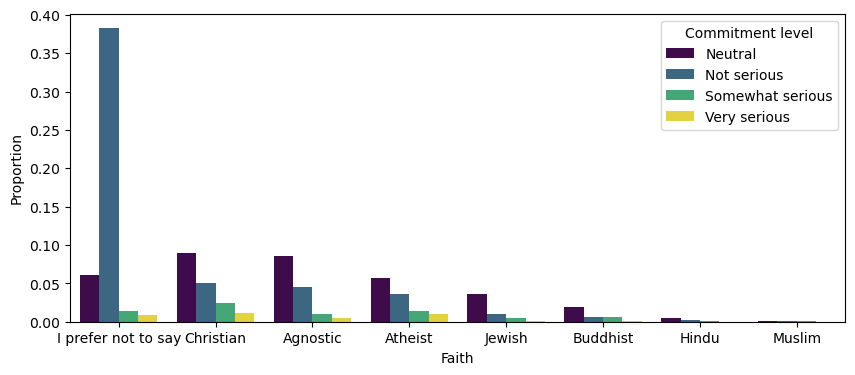

In [46]:
order_rel = df.religion.value_counts()
order_commit = df.rel_commit.value_counts()

plt.figure(figsize=(10, 4))
sns.countplot(x = df.religion, order = order_rel.index, stat= 'proportion', hue = df.rel_commit, palette = 'viridis', hue_order=order_commit.index)
plt.legend(title = 'Commitment level', labels = ['Neutral', 'Not serious', 'Somewhat serious', 'Very serious'])
plt.xlabel('Faith')
plt.ylabel('Proportion')
plt.show()
plt.close()

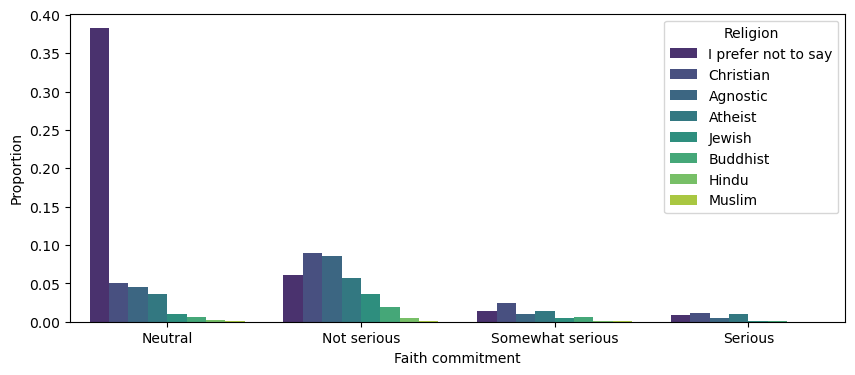

In [47]:
order_commit = df.rel_commit.value_counts()

plt.figure(figsize=(10, 4))
sns.countplot(x = df.rel_commit, order = order_commit.index, stat= 'proportion', hue = df.religion, palette = 'viridis', hue_order=order_rel.index)
plt.legend(title = 'Religion')
plt.xticks(ticks = [0, 1, 2, 3], labels = ['Neutral', 'Not serious', 'Somewhat serious', 'Serious'])
plt.xlabel('Faith commitment')
plt.ylabel('Proportion')
plt.show()
plt.close()

In [48]:
def simplify_diet(row):
    # Simplify diet values into broader categories
    if 'anything' in row:
        return 'General Diet'
    elif 'vegetarian' in row:
        return 'Vegetarian'
    elif 'vegan' in row:
        return 'Vegan'
    elif 'kosher' in row or 'halal' in row:
        return 'Religious'
    elif 'other' in row:
        return 'Other'
    elif 'I prefer not to say' in row:
        return 'Prefer Not to Say'
    else:
        return 'Other'

# Apply the function to the column
df['diet'] = df['diet'].apply(simplify_diet)

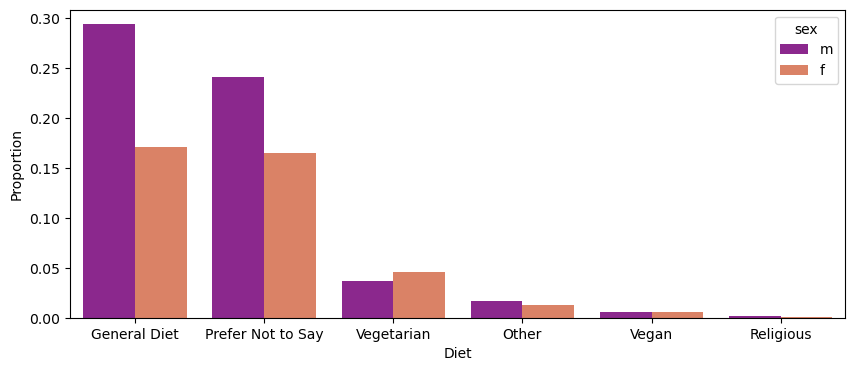

In [49]:
order_diet = df.diet.value_counts()

plt.figure(figsize=(10,4))
sns.countplot(x = df.diet, order = order_diet.index, stat = 'proportion',hue = df.sex, palette = 'plasma')
plt.xlabel('Diet')
plt.ylabel('Proportion')
plt.show()
plt.close()

In [50]:
print(df.job.value_counts(normalize=True))

job
other                                0.146656
student                              0.094324
science / tech / engineering         0.093687
computer / hardware / software       0.091000
artistic / musical / writer          0.085783
sales / marketing / biz dev          0.084855
medicine / health                    0.071115
education / academia                 0.067888
executive / management               0.045858
banking / financial / real estate    0.043790
entertainment / media                0.043481
law / legal services                 0.026688
hospitality / travel                 0.026359
construction / craftsmanship         0.019731
clerical / administrative            0.015556
political / government               0.013682
rather not say                       0.008426
transportation                       0.007073
unemployed                           0.005276
retired                              0.004831
military                             0.003942
Name: proportion, dtype: float

In [51]:
def simplify_job_category(job):
    if job in ['science / tech / engineering', 'computer / hardware / software']:
        return 'STEM'
    elif job in ['artistic / musical / writer', 'entertainment / media']:
        return 'Creative & Entertainment'
    elif job in ['sales / marketing / biz dev', 'executive / management', 'banking / financial / real estate']:
        return 'Business & Finance'
    elif job == 'education / academia':
        return 'Education & Academia'
    elif job == 'medicine / health':
        return 'Healthcare & Medicine'
    elif job in ['law / legal services', 'political / government']:
        return 'Legal & Government'
    elif job in ['hospitality / travel', 'clerical / administrative', 'construction / craftsmanship']:
        return 'Service Industry'
    elif job in ['transportation', 'construction / craftsmanship']:
        return 'Transportation & Trades'
    elif job in ['other', 'retired', 'military']:
        return 'Other'
    elif job in ['rather not say']:
        return 'Prefer not to say'
    elif job == 'student':
        return 'Student & Unemployed'
    elif job == 'unemployed':
        return 'Student & Unemployed'
    else:
        return 'Other'

# Apply the function to the job column
df['job'] = df['job'].apply(simplify_job_category)

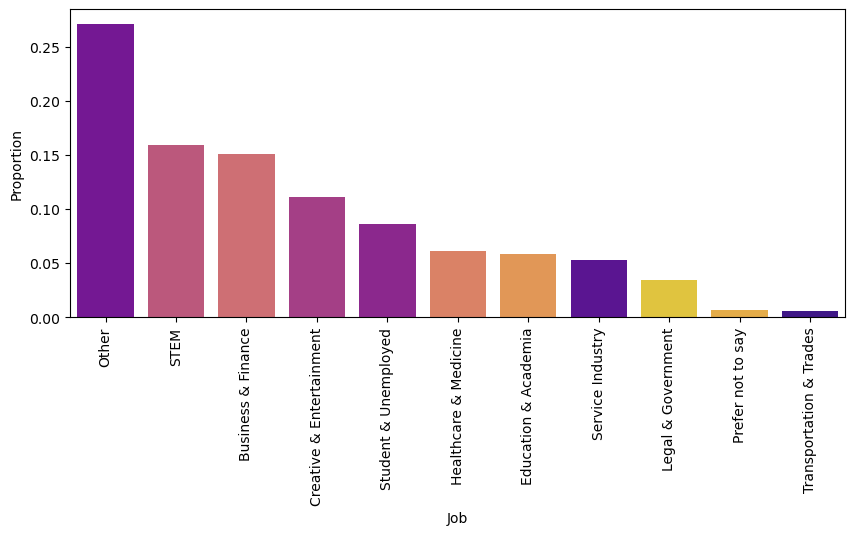

In [52]:
order_job = df.job.value_counts()

plt.figure(figsize=(10, 4))
sns.countplot(x = df.job, order = order_job.index, stat = 'proportion', hue = df.job, palette = 'plasma', legend = False)
plt.xticks(rotation = 'vertical')
plt.xlabel('Job')
plt.ylabel('Proportion')
plt.show()
plt.close()

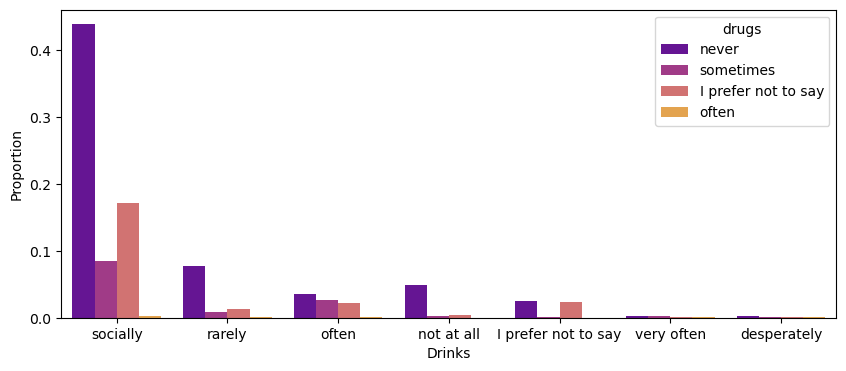

In [53]:
order_drinks = df.drinks.value_counts()

plt.figure(figsize=(10,4))
sns.countplot(x = df.drinks, order = order_drinks.index, hue = df.drugs, palette = 'plasma', stat= 'proportion')
plt.xlabel('Drinks')
plt.ylabel('Proportion')
plt.show()
plt.close()

In [54]:
df.loc[df.drugs == 'never', 'drugs'] = 1
df.loc[df.drugs == 'sometimes', 'drugs'] = 2
df.loc[df.drugs == 'I prefer not to say', 'drugs'] = 0
df.loc[df.drugs == 'often', 'drugs'] = 3

print(df.drugs.value_counts(normalize=True))


drugs
1    0.629304
0    0.234869
2    0.128987
3    0.006840
Name: proportion, dtype: float64


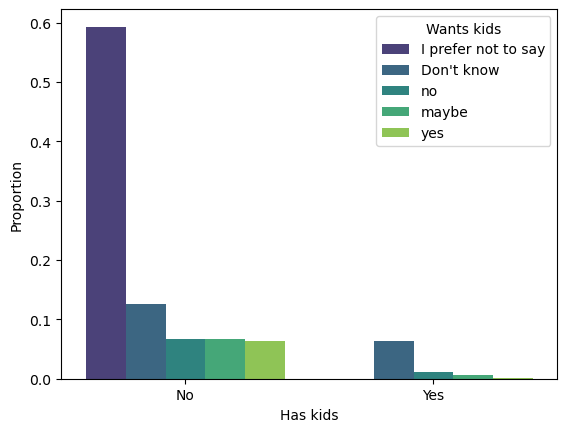

In [55]:
order_kids = df.kids.value_counts()
order_offs = df.offspring.value_counts()

sns.countplot(x = df.kids, order = order_kids.index, stat = 'proportion', hue = df.offspring, palette = 'viridis', hue_order=order_offs.index)
plt.legend(title = 'Wants kids')
plt.xlabel('Has kids')
plt.xticks(ticks = [0, 1], labels= ['No', 'Yes'])
plt.ylabel('Proportion')
plt.show()
plt.close()

The sign feature has a lot of unique categories as well that contain multiple information, both about the zodial sign and the level of trust. Similarly to other cases, I will separate the information and simplify the columns. 

In [57]:
print(df.sign.value_counts())

sign
gemini and it&rsquo;s fun to think about         1782
scorpio and it&rsquo;s fun to think about        1772
leo and it&rsquo;s fun to think about            1692
libra and it&rsquo;s fun to think about          1649
taurus and it&rsquo;s fun to think about         1640
cancer and it&rsquo;s fun to think about         1597
pisces and it&rsquo;s fun to think about         1592
sagittarius and it&rsquo;s fun to think about    1583
virgo and it&rsquo;s fun to think about          1574
aries and it&rsquo;s fun to think about          1573
aquarius and it&rsquo;s fun to think about       1503
virgo but it doesn&rsquo;t matter                1497
leo but it doesn&rsquo;t matter                  1457
cancer but it doesn&rsquo;t matter               1454
gemini but it doesn&rsquo;t matter               1453
taurus but it doesn&rsquo;t matter               1450
libra but it doesn&rsquo;t matter                1408
aquarius but it doesn&rsquo;t matter             1407
capricorn and it&rsquo;

In [58]:
df = df.fillna({'sign': 'None'})

In [59]:
def simplify_beliefz(row):
    if 'but' in row:
        return 1
    if 'fun' in row:
        return 3
    if 'a lot' in row: 
        return 4
    else: 
        return 2

df['believer_zodiac'] = df['sign'].apply(simplify_beliefz)
print(df.believer_zodiac.value_counts(normalize = True))


believer_zodiac
2    0.386678
3    0.322518
1    0.279544
4    0.011261
Name: proportion, dtype: float64


In the new believer_zodiac column, I encoded in a ordinal way the information about the level of belief in zodiac signs. The scale goes from 1 to 4 where <br>
- 1: I don't believe in the horoscope
- 2: Neutral
- 3: I kinda believe in the horoscope
- 4: I am a strong believer of the horoscope

In [61]:
def simplify_sign(row):
    if 'leo' in row:
        return 'Leo'
    elif 'libra' in row: 
        return 'Libra'
    elif 'cancer' in row:
        return 'Cancer'
    elif 'virgo' in row: 
        return 'Virgo'
    elif 'scorpio' in row:
        return 'Scorpio'
    elif 'gemini' in row:
        return 'Gemini'
    elif 'taurus' in row:
        return 'Taurus'
    elif 'aries' in row:
        return 'Aries'
    elif 'pisces' in row: 
        return 'Pisces'
    elif 'aquarius' in row:
        return 'Aquarius'
    elif 'sagittarius' in row:
        return 'Sagittarius'
    elif 'capricorn' in row: 
        return 'Capricorn'
    else: 
        return 'None'

df.sign = df.sign.apply(simplify_sign)
print(df.sign.value_counts(normalize=True))

sign
None           0.184422
Leo            0.072968
Gemini         0.071900
Libra          0.070182
Cancer         0.070165
Virgo          0.069081
Taurus         0.069064
Scorpio        0.068964
Aries          0.066545
Pisces         0.065828
Sagittarius    0.065761
Aquarius       0.065511
Capricorn      0.059606
Name: proportion, dtype: float64


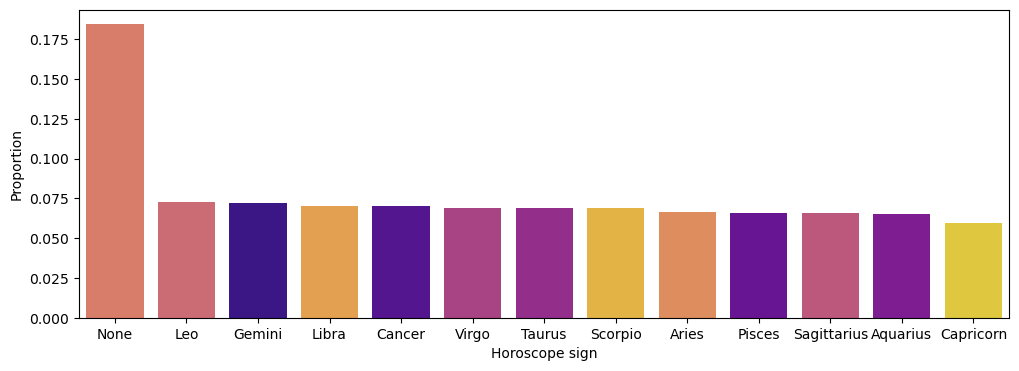

In [62]:
order_sign = df.sign.value_counts()

plt.figure(figsize=(12, 4))
sns.countplot(x = df.sign, order = order_sign.index ,stat = 'proportion', hue = df.sign, palette = 'plasma')
plt.xlabel('Horoscope sign')
plt.ylabel('Proportion')
plt.show()
plt.close()

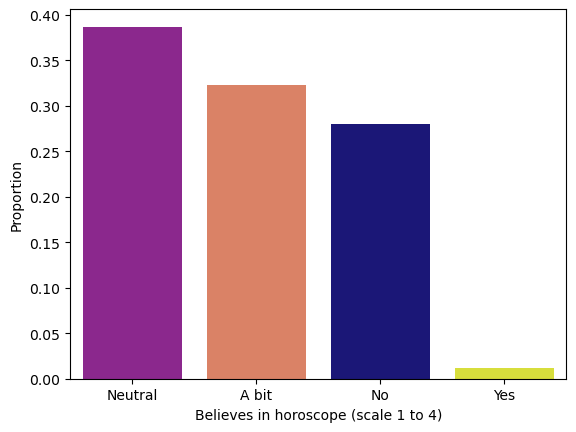

In [63]:
order_horoscope = df.believer_zodiac.value_counts()

sns.countplot(x = df.believer_zodiac, order = order_horoscope.index, hue = df.believer_zodiac, stat = 'proportion', palette = 'plasma', legend = False)
plt.xticks(ticks = [0, 1, 2, 3], labels = ['Neutral', 'A bit', 'No', 'Yes'])
plt.xlabel('Believes in horoscope (scale 1 to 4)')
plt.ylabel('Proportion')
plt.show()
plt.close()

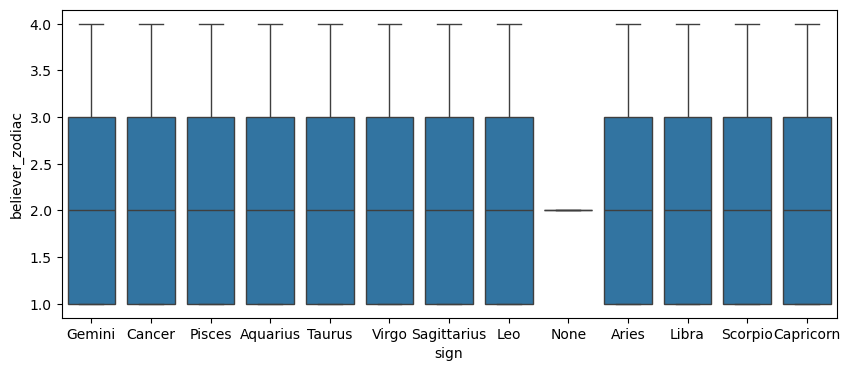

In [64]:
plt.figure(figsize=(10, 4))
sns.boxplot(data = df, x = 'sign', y = 'believer_zodiac')
plt.show()
plt.close()

In [65]:
print(df.speaks.isna().sum())
df = df.dropna(subset = ['speaks'])
#I'm going to remove nan values from the speaks column because it's a very small fractions of all users

50


In [66]:
print(df.speaks.head(10))

0                                              english
1    english (fluently), spanish (poorly), french (...
2                                 english, french, c++
3                             english, german (poorly)
4                                              english
5                   english (fluently), chinese (okay)
6                                              english
7                              english, spanish (okay)
8                                              english
9                                   english (fluently)
Name: speaks, dtype: object


In [67]:
def simplify_language(row):
    languages = row.split(',')
    return len(languages)

df.speaks = df.speaks.apply(simplify_language)
print(df.speaks.head(10))
print(df.speaks.value_counts(normalize=True))
#I let go of the information about the fluency level because I don't think it matters that much

0    1
1    3
2    3
3    2
4    1
5    2
6    1
7    2
8    1
9    1
Name: speaks, dtype: int64
speaks
1    0.485357
2    0.287658
3    0.144956
4    0.054279
5    0.027749
Name: proportion, dtype: float64


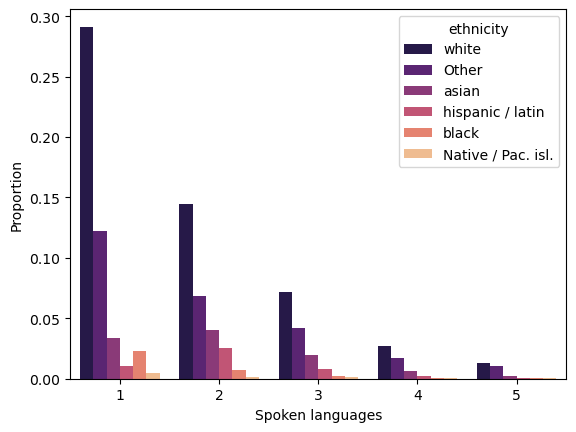

In [155]:
order_lan = df.speaks.value_counts()

sns.countplot(x = df.speaks, stat = 'proportion', order = order_lan.index, hue = df.ethnicity, palette = 'magma', hue_order= order_ethn.index)
plt.xlabel('Spoken languages')
plt.ylabel('Proportion')
plt.show()
plt.close()

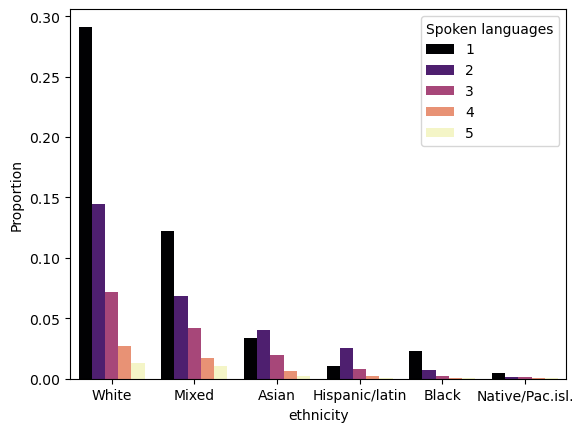

In [169]:
order_lan = df.speaks.value_counts()

sns.countplot(x = df.ethnicity, stat = 'proportion', order = order_ethn.index, hue = df.speaks, palette = 'magma', hue_order=order_lan.index)
plt.xticks(ticks = [0, 1, 2, 3, 4, 5], labels = ['White', 'Mixed', 'Asian', 'Hispanic/latin', 'Black', 'Native/Pac.isl.'])
plt.ylabel('Proportion')
plt.legend(title = 'Spoken languages', alignment = 'left')
plt.show()
plt.close()

In [68]:
con_table = pd.crosstab(df.offspring, df.sex, normalize = True)
print(con_table)
#Cannot find obvious correlations among cat variables

sex                         f         m
offspring                              
Don't know           0.084566  0.104401
I prefer not to say  0.220590  0.372525
maybe                0.028434  0.044963
no                   0.035362  0.044378
yes                  0.033442  0.031339


In [69]:
print(df.last_online)
#This data dates back to 2012, without knowing when the database was saved, there's little I can do with it. 

0        2012-06-28-20-30
1        2012-06-29-21-41
2        2012-06-27-09-10
3        2012-06-28-14-22
4        2012-06-27-21-26
               ...       
59941    2012-06-12-21-47
59942    2012-06-29-11-01
59943    2012-06-27-23-37
59944    2012-06-23-13-01
59945    2012-06-29-00-42
Name: last_online, Length: 59894, dtype: object


With the data I have i can perform user segmentation using an unsupervised machine learning algorithm or build a recommendation system. <br>
This is the roadmap for the user segmentation: <br>
1. Standardize the numerical variables
2. Encode the categorical variables
3. Perform feature engineering (wrapper method) to choose the features to feed to the model
4. Choose a number of clusters (inertia or silhouette score)
5. Apply the chosen features and number of clusters to the k means model
6. Interpret the results 

In [71]:
#Let's look at the datatypes again 
df.drugs = df.drugs.astype(int)
print(df.dtypes)

#We now have 7 numerical variables, however only the original ones (age, height, income) can be standardized because the other ones are categorical actually. 

age                  int64
body_type           object
diet                object
drinks              object
drugs                int32
education           object
essay0              object
essay1              object
essay2              object
essay3              object
essay4              object
essay5              object
essay6              object
essay7              object
essay8              object
essay9              object
ethnicity           object
height             float64
income               int64
job                 object
last_online         object
location            object
offspring           object
orientation         object
pets                object
religion            object
sex                 object
sign                object
smokes              object
speaks               int64
status              object
kids               float64
has_pet            float64
rel_commit           int64
believer_zodiac      int64
dtype: object


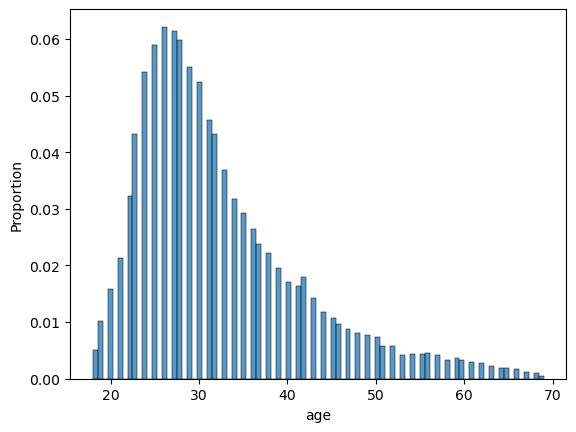

In [72]:
#Let's look at the distribution of the variables to standardize 
sns.histplot(df.age, stat = 'proportion')
plt.show()
plt.close()

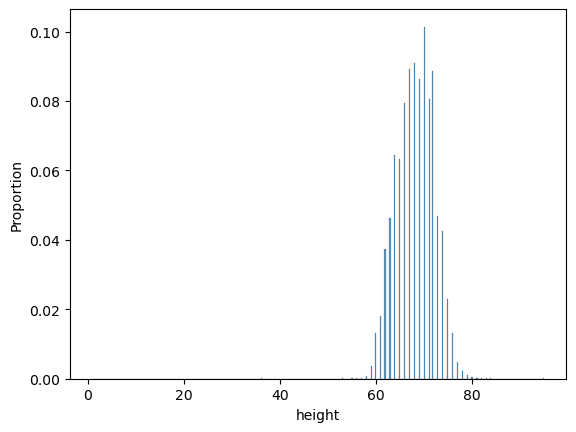

In [73]:
sns.histplot(df.height, stat = 'proportion')
plt.show()
plt.close()

In [75]:
#I used the mixmax scaler in order for the model to evaluate these three features in the same way

scaler = MinMaxScaler()
df.age = scaler.fit_transform(df[['age']])
df.income = scaler.fit_transform(df[['income']])
df.height = scaler.fit_transform(df[['height']])

Now it's time to encode the categorical variables, some are already numerically encoded like "kids" (0,1), "has_pets" (0,1), "believer_zodiac" (scale 1 to 4), "religious commitment" (scale 1 to 4), "speaks" (number from 1 to 5) and "drugs" (scale 0 to 3). <br>
<br>
I will not consider the essays, the location (almost all users are based in California), the last online activity (difficult to interpret at a distance of 12 years). This leaves body type, diet, drinks, education, ethnicity, job, offspring, orientation, pets, religion, sign, smokes, status.<br>

In [232]:
#Let's start by removing the features we don't need 
df = df.drop(['essay0', 'essay1', 'essay2', 'essay3', 'essay4', 'essay5', 'essay6', 'essay7', 'essay8', 'essay9', 'last_online', 'location'], axis = 1)
print(df.columns)

Index(['age', 'body_type', 'diet', 'drinks', 'drugs', 'education', 'ethnicity',
       'height', 'income', 'job', 'offspring', 'orientation', 'pets',
       'religion', 'sex', 'sign', 'smokes', 'speaks', 'status', 'kids',
       'has_pet', 'rel_commit', 'believer_zodiac'],
      dtype='object')


In [236]:
for column in df.columns:
    print(f'{column}: {df[column].nunique()}')

# Age, height and income are scaled
# Drugs, kids, has pets, rel_commit, speaks and believer_zodiac are already numerically encoded

age: 52
body_type: 5
diet: 6
drinks: 7
drugs: 4
education: 8
ethnicity: 6
height: 60
income: 13
job: 11
offspring: 5
orientation: 3
pets: 5
religion: 8
sex: 2
sign: 13
smokes: 5
speaks: 5
status: 5
kids: 2
has_pet: 4
rel_commit: 4
believer_zodiac: 4


In [238]:
for column in df.columns:
    if df[column].dtype == object:
        print(f'{column}: {df[column].nunique()}')
#This leaves 14 categorical features that need encoding 
#Features with 2-3 categories can be one-hot encoded with the drop_first option on (orientation, sex)
#Features with 5-8 categories should be binary encoded because it reduces dimensionality compared to one-hot but more interpretability than hashing (body_type, diet, drinks, education, ethnicity, offspring, pets, religion, smokes, status)
#Features with more than 8 categories, hashing is an option although interpretability is reduced (job, sign)

body_type: 5
diet: 6
drinks: 7
education: 8
ethnicity: 6
job: 11
offspring: 5
orientation: 3
pets: 5
religion: 8
sex: 2
sign: 13
smokes: 5
status: 5


In [296]:
encoder = OneHotEncoder(drop='first', sparse_output=False)
one_hot = encoder.fit_transform(df[['orientation', 'sex']])
# Transforming back into df
one_hot_df = pd.DataFrame(one_hot, columns=encoder.get_feature_names_out(['orientation', 'sex']))
print(one_hot_df.shape)

(59894, 3)


In [294]:
binary_enc = ce.BinaryEncoder()
binary = binary_enc.fit_transform(df[['body_type', 'diet', 'drinks', 'education', 'ethnicity', 'offspring', 'pets', 'religion', 'smokes', 'status']])

# Transforming back into df
binary_df = pd.DataFrame(binary, columns=binary_enc.get_feature_names_out(['body_type', 'diet', 'drinks', 'education', 'ethnicity', 'offspring', 'pets', 'religion', 'smokes', 'status']))
print(binary_df.shape)

(59894, 32)


In [280]:
hash_enc = FeatureHasher(n_features = 4)
job_hasher = hash_enc.fit_transform(df[['job']].to_dict(orient = 'records'))
sign_hasher = hash_enc.fit_transform(df[['sign']].to_dict(orient = 'records'))

# Transforming back into df
job_df = pd.DataFrame(job_hasher.toarray(), columns = ['Job_f0', 'Job_f1', 'Job_f2', 'Job_f3'])
sign_df = pd.DataFrame(sign_hasher.toarray(), columns = ['Sign_f0', 'Sign_f1', 'Sign_f2', 'Sign_f3'])
print(job_df, sign_df)

       Job_f0  Job_f1  Job_f2  Job_f3
0         0.0     0.0    -1.0     0.0
1         0.0     1.0     0.0     0.0
2         0.0    -1.0     0.0     0.0
3         0.0     0.0    -1.0     0.0
4         0.0     1.0     0.0     0.0
...       ...     ...     ...     ...
59889     0.0     0.0    -1.0     0.0
59890     0.0     1.0     0.0     0.0
59891     0.0     1.0     0.0     0.0
59892     0.0    -1.0     0.0     0.0
59893     0.0    -1.0     0.0     0.0

[59894 rows x 4 columns]        Sign_f0  Sign_f1  Sign_f2  Sign_f3
0          0.0      0.0      1.0      0.0
1          0.0      1.0      0.0      0.0
2          0.0      1.0      0.0      0.0
3          0.0      1.0      0.0      0.0
4          1.0      0.0      0.0      0.0
...        ...      ...      ...      ...
59889      0.0      1.0      0.0      0.0
59890      0.0     -1.0      0.0      0.0
59891      0.0      0.0     -1.0      0.0
59892      0.0     -1.0      0.0      0.0
59893      0.0      0.0      1.0      0.0

[59894 rows x

In [302]:
encoded_df = pd.concat([one_hot_df, binary_df, job_df, sign_df], axis = 1)
print(encoded_df.head())
print(encoded_df.columns)

   orientation_gay  orientation_straight  sex_m  body_type_0  body_type_1  \
0              0.0                   1.0    1.0          0.0          0.0   
1              0.0                   1.0    1.0          0.0          1.0   
2              0.0                   1.0    1.0          0.0          1.0   
3              0.0                   1.0    1.0          0.0          1.0   
4              0.0                   1.0    1.0          0.0          1.0   

   body_type_2  diet_0  diet_1  diet_2  drinks_0  ...  status_1  status_2  \
0          1.0     0.0     0.0     1.0       0.0  ...       0.0       1.0   
1          0.0     0.0     1.0     0.0       0.0  ...       0.0       1.0   
2          1.0     0.0     0.0     1.0       0.0  ...       1.0       0.0   
3          1.0     0.0     1.0     1.0       0.0  ...       0.0       1.0   
4          1.0     1.0     0.0     0.0       0.0  ...       0.0       1.0   

   Job_f0  Job_f1  Job_f2  Job_f3  Sign_f0  Sign_f1  Sign_f2  Sign_f3  
0 

Nice! Encoding is done so now it's time for feature engineering. <br> 
I will approach this by starting a K-means model and then using a wrapper method (probably sbfs) to select only the features that contribute the most. 